# 🤯**Deep Learning TeamProject**

### **📸홍삼의 X-ray이미지와 📋테이블 데이터 기반 품질 분류 모델**

> ##### Team_02 - 최봉준, 서동석, 이정환, 이은재

## **1. 주제 선정 동기 및 배경**

### **기존 홍삼품질 분류 시스템**

<img src="https://github.com/lej8924/DeepLearning_team02/assets/71022086/b526c056-a0ef-47de-9135-2afce2af201a" width ="30%" style="float:left">
<img src="https://www.shutterstock.com/image-vector/magnifying-glass-despair-woman-examining-260nw-2222888163.jpg" width="30%" style="max-height:300px;">
* 현재 홍삼 등급 판정은 검사관의 눈으로 내부상태(내백, 내공)와 내부조직의 치밀도를 판별하는 육안검사로 진행됨

* 즉 검사관의 숙련도 및 컨디션 등 주관적인 평가에 의존해왔음

>> #### 이미지와 몇 가지 정보만 넣으면 품질을 분류해주는 모델은 어떨까...?
<table>
<tr>
<td><img src="https://github.com/lej8924/DeepLearning_team02/assets/71022086/b526c056-a0ef-47de-9135-2afce2af201a" style="float:left;"></td>
<td><img src ="https://github.com/lej8924/DeepLearning_team02/assets/71022086/83d19d14-4e5e-4715-95fe-de0c151b0d9c" ></td>
</tr>
</table>



* [Ai hub](https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100)에 존재하는 *진안홍삼 품질 데이터*을 이용하여 모델을 만들어보자!
* 내부품질등급의 기준이 되는 내부조직, 내공, 내백등의 데이터를 잘 이용해보자!
* 이미지 데이터와 테이블 데이터가 pair로 존재하므로 각각만 사용하는 모델과 두 개를 합쳐서 사용하는 모델을 만들어보자

> ## 💡우리의 기대 : 이미지 데이터와 테이블 데이터를 합친 모델의 성능이 높게 나올 것이다

## **2. 분석 모델 선정**

### **Proposal에서 달라진 점**

* metric : macro F1-score => **image data로 model hyperparameter를 찾는 과정에서만 f1-score가 아닌 accuracy를 metric으로 사용하였다.**

* tabular data의 model로 Tabnet을 선택했었지만, **Tabnet이 아닌 우리가 직접 layer를 쌓아서 model을 만들었다.**

### **DataSet 탐색**

>![image](https://github.com/lej8924/DeepLearning_team02/assets/71022086/21380cab-32a7-432c-982b-7f11ae52267f)
>
> image data만을 분석할 때는 이러한 dataset을 사용하였다

>![image](https://github.com/lej8924/DeepLearning_team02/assets/71022086/310ccb69-65f4-4765-a76f-b264bce2032b)
>
>하지만 table dataset의 정보와 실존하는 image dataset 간에 불일치하는 data가 존재하여 교집합 했을 때 없는 것들을 제외하였다. 그랬더니 data 수가 많이 줄었다

### **목표**

* Ai Hub에 있는 기존모델인 YOLOv5보다 성능을 좋게 만들어보자

### **시도**

* **시도 1 : *상,중,하,최하* dataset의 불균형을 해결해보자**

* **시도 2 : 이미지 데이터와 테이블 데이터를 합쳐서 multimodal 모델을 만들어보자**

* **시도 3 : 이미지 데이터를 분류하는 여러가지 사전 학습 모델의 성능을 비교해서, best 성능을 내는 것으로 선정하자**

---
### **분류 모델 후보군**

> #### image classification models
> <table>
> <tr><td> <b>vgg16</b> </td><td><b>Resnet50</b></td><td><b>inception v3</b></td></tr>
> <tr style="background-color:#ffffff;"><td><img src = "https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16-1024x450.jpg"></td><td ><img src="https://cdn.educba.com/academy/wp-content/uploads/2022/10/Keras-ResNet50.jpg.webp"></td><td><img src="https://iq.opengenus.org/content/images/2021/09/Untitled--9-.png"></td></tr>
> </table>
<br>

>#### tabular classification model
> ### **우리가 직접 쌓는 모델**
>![image](https://github.com/lej8924/DeepLearning_team02/assets/71022086/9fb4cc74-3b4f-4283-9255-ef0aaf0ad7c0)


>#### multimodal model
>
>![image](https://github.com/naity/image_tabular/raw/master/pics/model.png)




## **데이터 전처리**

1. table data 정제

In [3]:
import pickle

with open('./df_pickle/train.pickle', 'rb') as f:
	data = pickle.load(f)

data.head()

,img_file_name,red_ginseng_width,red_ginseng_length,inner_hole_discrimination,inner_hole_width,inner_hole_length,inside_whites_discrimination,inside_whites_width,inside_whites_length,classification
0,20220706_Xray_000005,20.3,125.2,무,NaN,NaN,유,10.85,46.84,최하
1,20220706_Xray_000006,20.1,90.7,무,NaN,NaN,유,7.21,36.99,최하
2,20220706_Xray_000009,20.1,125.1,무,NaN,NaN,유,10.78,56.98,최하
3,20220706_Xray_000013,17.9,129.5,무,NaN,NaN,유,9.42,54.26,최하
4,20220706_Xray_000019,17.2,128.1,무,NaN,NaN,유,6.71,67.12,최하


In [9]:
scaler = StandardScaler()

tmp = pd.read_csv('final_train.csv')
tmp = tmp.drop(tmp.columns[:2],axis=1)

lb = LabelBinarizer()
tmp['enc_label'] = lb.fit_transform(tmp['classification']).tolist()

tmp[tmp.columns.difference(['img_file_name','classification','enc_label'])] = scaler.fit_transform(tmp[tmp.columns.difference(['img_file_name','classification','enc_label'])])

tmp.head()

,img_file_name,red_ginseng_width,red_ginseng_length,inner_hole_discrimination,inner_hole_width,inner_hole_length,inside_whites_discrimination,inside_whites_width,inside_whites_length,classification,enc_label
0,./datasets/train/최하/20220706_Xray_000005.jpg,1.156485,1.774446,-0.108081,-0.070201,-0.074161,0.246203,0.996604,0.578076,최하,"[0, 0, 1]"
1,./datasets/train/최하/20220706_Xray_000006.jpg,1.104127,-0.256884,-0.108081,-0.070201,-0.074161,0.246203,-0.098555,0.033544,최하,"[0, 0, 1]"
2,./datasets/train/최하/20220706_Xray_000009.jpg,1.104127,1.768558,-0.108081,-0.070201,-0.074161,0.246203,0.975543,1.138641,최하,"[0, 0, 1]"
3,./datasets/train/최하/20220706_Xray_000013.jpg,0.528197,2.027626,-0.108081,-0.070201,-0.074161,0.246203,0.566363,0.988272,최하,"[0, 0, 1]"
4,./datasets/train/최하/20220706_Xray_000019.jpg,0.344946,1.945195,-0.108081,-0.070201,-0.074161,0.246203,-0.248989,1.699205,최하,"[0, 0, 1]"


2. image data hyperparameter 선택

* 전체 Dataset에 대한 모델링


![image](https://github.com/lej8924/DeepLearning_team02/assets/71022086/721e9041-76a8-4344-b47c-70e457db23a7)

### * 부분 Dataset에 대한 Hyperparameter 찾기 시도

1. Batch_size

![image](https://github.com/lej8924/DeepLearning_team02/assets/71022086/0ab30e00-10f9-495e-868e-39e4f51be180)

> batch 32가 성능이 제일 좋았지만, batch가 128일때와 차이가 별로 나지 않았기 때문에 **batch size : 128**로 결정

----
2. Input_size 변경 

![image](https://github.com/lej8924/DeepLearning_team02/assets/71022086/547fb1e1-838e-4cd7-84a0-892505e17e4a)

>pretrained model의 weight가 224*224이어서 **input size : 224 X 224**로 결정
----
3. Cropping 시도

![image](https://github.com/lej8924/DeepLearning_team02/assets/71022086/0b8af541-f860-42b1-90b7-63e0db31e668)

>cropping을 naive하게 해봤는데, 크게 의미가 없어서 **안 하기로** 결정

## Default setting
- epoch : 20
- batch_size : 128
- callback
    - earlystopping(validation f1-score 기준, 5epoch 동안 향상 없으면 중단)
    - ModelCheckpoint : validation f1-score 기준 최대 일떄, 저장
- 데이터 수
    - 상 : 10,000개
    - 중 : 10,000개
    - 최하 : 10,000개
- classification layer
    - GlobalAveragePooling2D()
    - Dense(256)
    - Dropout(0.3)
    - Dense(3,softmax)
- input_size : (224,224)

## **3. Modeling**

In [ ]:
# Base Libraries
import random
import warnings
import os

# Data Handling
import pandas as pd
import numpy as np

# Image Processing
import cv2
from tqdm.auto import tqdm

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.metrics import f1_score, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# Torchvision
import torchvision.models as models

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3, VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, 
                                     BatchNormalization, Dropout, Activation,
                                     GlobalAveragePooling2D)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Albumentations
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

# TensorFlow Addons
import tensorflow_addons as tfa

warnings.filterwarnings(action='ignore') 

### 👀**image data Model**

### 직접만든 모델

In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding = 'same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding = 'same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# 모델 summary
model.summary()
    
# 모델 컴파일
model.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=3, average='macro')])

es = EarlyStopping(monitor='val_f1_score', patience=5, mode = 'max')
epochs = 20



history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[es]
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_8 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                      

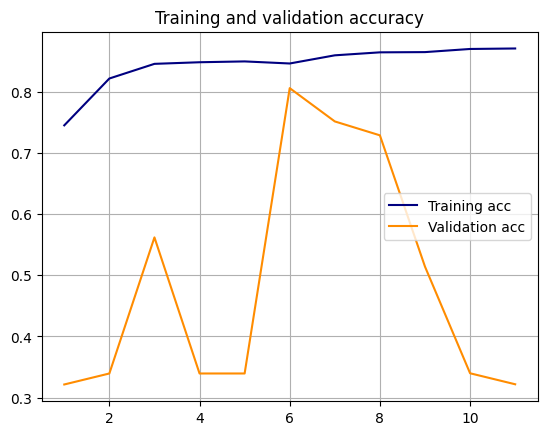

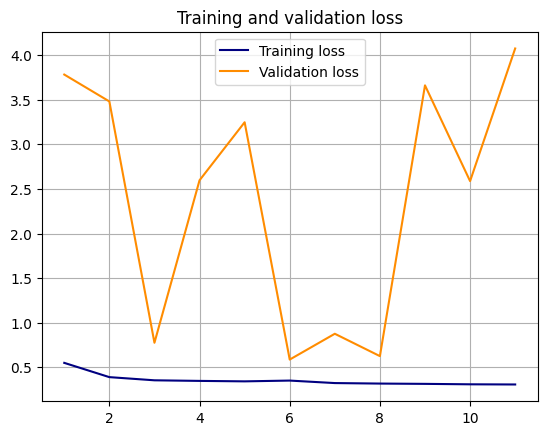

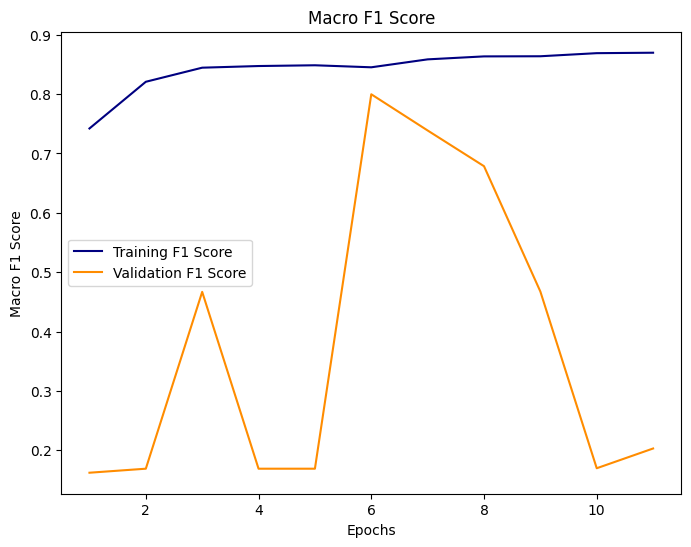

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
f1_scores = history.history['f1_score']
val_f1_scores = history.history['val_f1_score']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'navy', label='Training acc') 
plt.plot(epochs, val_acc, 'darkorange', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.grid()
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'navy', label='Training loss') 
plt.plot(epochs, val_loss, 'darkorange', label='Validation loss') 
plt.title('Training and validation loss') 
plt.grid()
plt.legend()

# Macro F1 점수 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(epochs, f1_scores, 'navy', label='Training F1 Score')
plt.plot(epochs, val_f1_scores, 'darkorange', label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Macro F1 Score')
plt.title('Macro F1 Score')
plt.legend()
plt.show()

## vgg16

In [ ]:

# VGG16 불러오기
conv_base = VGG16(input_shape=(224, 224, 3),
                              include_top=False,
                              weights="imagenet")

# CNN 모델 정의
model = Sequential([
    conv_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])


# 마지막 conv layer 제외하고 parameter freeze
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv3':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# 모델 summary
model.summary()
    
# 모델 컴파일
model.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=3, average='macro')])

es = EarlyStopping(monitor='val_f1_score', patience=5, mode = 'max')
epochs = 20



history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[es]
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 3)                 771       
                                                                 
Total params: 14,846,787
Trainable params: 2,491,907
Non-trainable params: 12,354,880
__________________________________

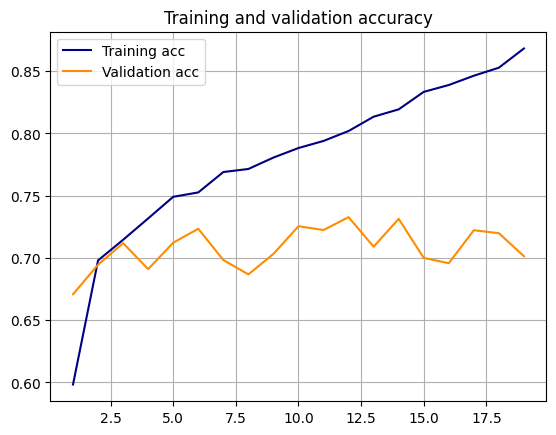

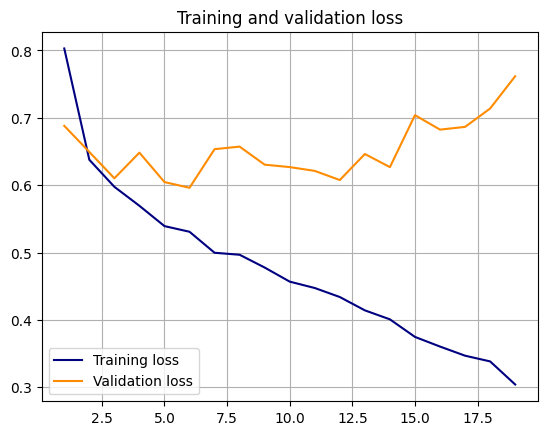

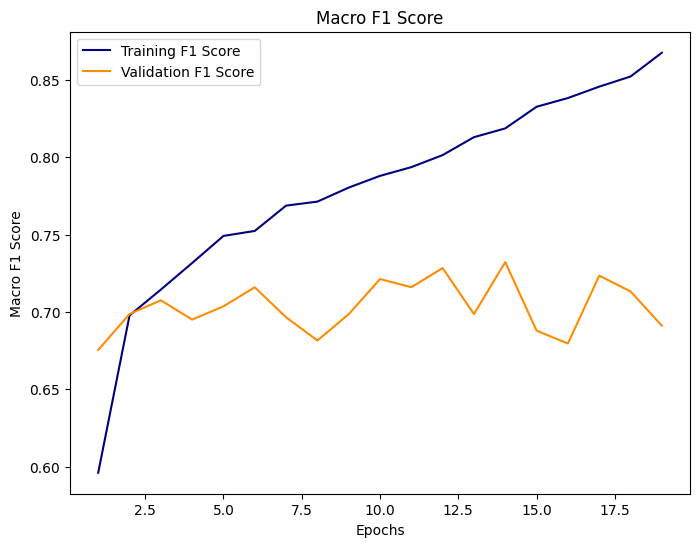

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
f1_scores = history.history['f1_score']
val_f1_scores = history.history['val_f1_score']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'navy', label='Training acc') 
plt.plot(epochs, val_acc, 'darkorange', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.grid()
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'navy', label='Training loss') 
plt.plot(epochs, val_loss, 'darkorange', label='Validation loss') 
plt.title('Training and validation loss') 
plt.grid()
plt.legend()

# Macro F1 점수 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(epochs, f1_scores, 'navy', label='Training F1 Score')
plt.plot(epochs, val_f1_scores, 'darkorange', label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Macro F1 Score')
plt.title('Macro F1 Score')
plt.legend()
plt.show()

### ===============================Inceptionv3===============================

In [ ]:
image_size = (224,224)

batch_size = 128

base_model = InceptionV3(input_shape=(224, 224, 3),
                              include_top=False,
                              weights="imagenet")

# 모델 정의
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# 'Mixed9' 레이어까지의 모든 레이어를 고정 (non-trainable)
for layer in base_model.layers:
    if layer.name == 'mixed9':
        break
    layer.trainable = False

model.summary()
    
# 모델 컴파일
model.compile(optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=3, average='macro')])



train_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    batch_size=batch_size,
    target_size=image_size,
    class_mode='categorical',
    subset='training',
    shuffle = True
)
val_generator = train_datagen.flow_from_directory(
    train_dir, 
    batch_size=batch_size,
    target_size=image_size,
    class_mode='categorical',
    subset='validation',
    shuffle = True
)

epochs = 20 

earlystop = EarlyStopping(monitor='val_loss',
                         patience=5)
model_ck = ModelCheckpoint(filepath='inception_val_loss_best_model.h5', 
                    monitor='val_loss',
                    save_best_only=True)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[earlystop,model_ck]
)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 256)               524544    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 3)                 771       
                                                                 
Total params: 22,328,099
Trainable params: 6,598,851
Non-trainable params: 15,729,248
__________________________________

2023-05-30 08:47:50.809139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8200


259/259 [==============================] - 1155s 4s/step - loss: 0.7737 - accuracy: 0.6409 - f1_score: 0.5833 - val_loss: 0.8360 - val_accuracy: 0.6373 - val_f1_score: 0.5344
Epoch 2/20
259/259 [==============================] - 336s 1s/step - loss: 0.6232 - accuracy: 0.7147 - f1_score: 0.6661 - val_loss: 0.8063 - val_accuracy: 0.6476 - val_f1_score: 0.5429
Epoch 3/20
259/259 [==============================] - 345s 1s/step - loss: 0.5456 - accuracy: 0.7506 - f1_score: 0.7072 - val_loss: 0.8817 - val_accuracy: 0.6223 - val_f1_score: 0.5720
Epoch 4/20
259/259 [==============================] - 337s 1s/step - loss: 0.4813 - accuracy: 0.7802 - f1_score: 0.7406 - val_loss: 0.9856 - val_accuracy: 0.6543 - val_f1_score: 0.5773
Epoch 5/20
259/259 [==============================] - 334s 1s/step - loss: 0.4024 - accuracy: 0.8170 - f1_score: 0.7806 - val_loss: 1.1081 - val_accuracy: 0.6557 - val_f1_score: 0.5636
Epoch 6/20
259/259 [==============================] - 341s 1s/step - loss: 0.3352 - a

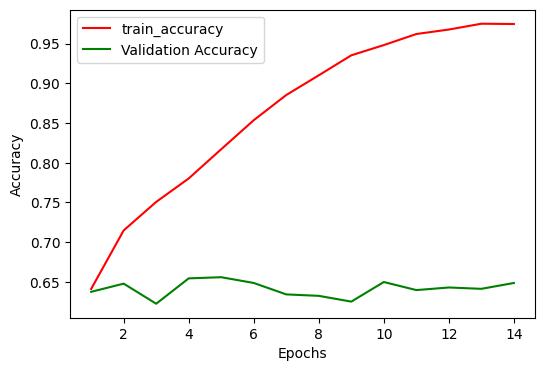

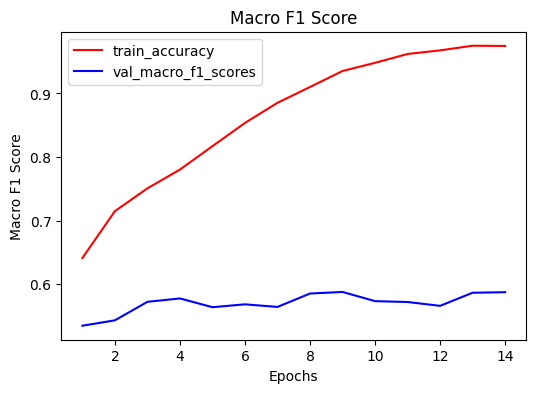

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
epochs=14
# train_loss.append(history.history['loss'][0])
train_accuracy= (history.history['accuracy'])
# val_loss.append(history.history['val_loss'][0])
val_accuracy= (history.history['val_accuracy'])
val_macro_f1_scores= (history.history['val_f1_score'])


plt.figure(figsize=(6,4))
plt.plot(range(1, epochs+1), train_accuracy,'r', label='train_accuracy')
plt.plot(range(1, epochs+1), val_accuracy,'g', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(range(1, epochs+1), train_accuracy,'r', label='train_accuracy')
plt.plot(range(1, epochs+1), val_macro_f1_scores,'b', label='val_macro_f1_scores')
plt.xlabel('Epochs')
plt.ylabel('Macro F1 Score')
plt.title('Macro F1 Score')
plt.legend()
plt.show()

### ==============================Resnet50===================================

In [ ]:
# 사전 학습된 ResNet50 모델 불러오기
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# CNN 모델 정의
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation = 'relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

for layer in base_model.layers:
    if layer.name == 'conv5_block3_3_conv':
        break
    layer.trainable = False
    
# 모델 summary
model.summary()
    
# 모델 컴파일
model.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=3, average='macro')])

es = EarlyStopping(monitor='val_f1_score', patience=5, mode = 'max')
epochs = 20



history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[es]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 24,113,027
Trainable params: 1,580,035
Non-trainable params: 22,532,992
__________________________________

2023-05-30 05:04:04.980259: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200


188/188 [==============================] - 819s 4s/step - loss: 0.8733 - accuracy: 0.5803 - f1_score: 0.5719 - val_loss: 0.9389 - val_accuracy: 0.5113 - val_f1_score: 0.5124
Epoch 2/20
188/188 [==============================] - 244s 1s/step - loss: 0.7721 - accuracy: 0.6319 - f1_score: 0.6246 - val_loss: 1.4736 - val_accuracy: 0.3918 - val_f1_score: 0.2736
Epoch 3/20
188/188 [==============================] - 247s 1s/step - loss: 0.7545 - accuracy: 0.6416 - f1_score: 0.6348 - val_loss: 1.0667 - val_accuracy: 0.4567 - val_f1_score: 0.3686
Epoch 4/20
188/188 [==============================] - 249s 1s/step - loss: 0.7416 - accuracy: 0.6491 - f1_score: 0.6421 - val_loss: 1.3300 - val_accuracy: 0.4175 - val_f1_score: 0.3301
Epoch 5/20
188/188 [==============================] - 250s 1s/step - loss: 0.7332 - accuracy: 0.6536 - f1_score: 0.6471 - val_loss: 1.7859 - val_accuracy: 0.3495 - val_f1_score: 0.2028
Epoch 6/20
188/188 [==============================] - 247s 1s/step - loss: 0.7154 - ac

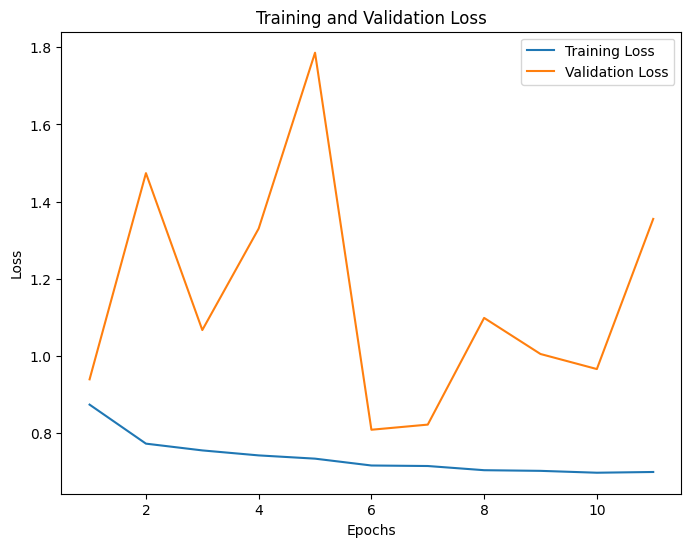

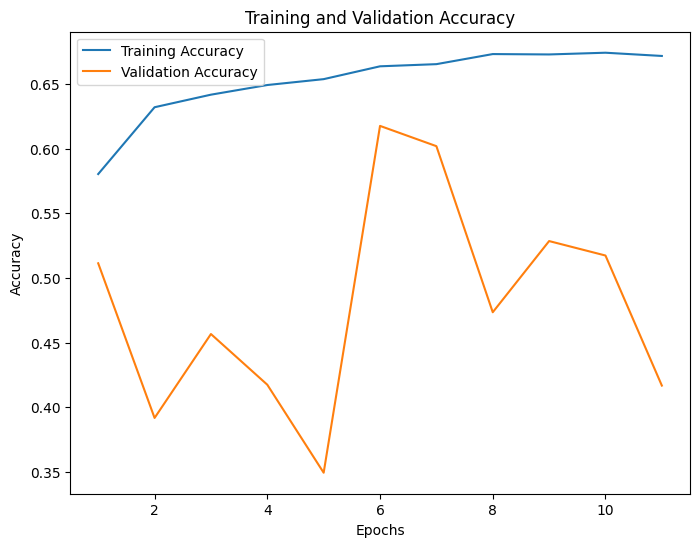

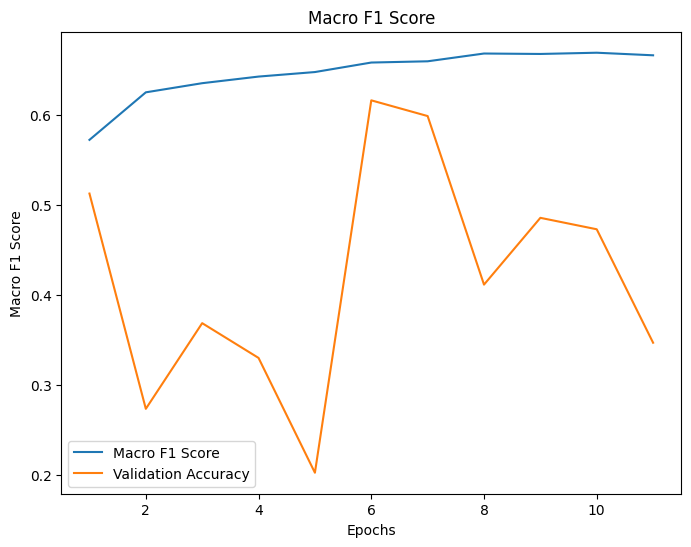

In [ ]:
epoch = 11
# 손실 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, epoch+1), history.history['loss'], label='Training Loss')
plt.plot(range(1, epoch+1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 정확도 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, epoch+1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, epoch+1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Macro F1 점수 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, epoch+1), history.history['f1_score'], label='Macro F1 Score')
plt.plot(range(1, epoch+1), history.history['val_f1_score'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Macro F1 Score')
plt.title('Macro F1 Score')
plt.legend()
plt.show()

### Best Image Model => VGG16
3가지 모델 중, 최적의 모델 고르기 위해서, default 실험 셋팅에서 진행했다.
학습 과정 중에 우리의 task에 알맞게 조정될 수 있도록, pretrianed parameter를 사용하되, 상위 마지막 layer의 파라미터를 trainable하게 설정했다.

> ## 3가지 중, validation f1 score가 가장 높았던 모델은 VGG16이었고, 약 0.73으로 epoch 14일 때가 가장 높았다.

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

## Data preprocessing for Validation (Table model & Multimodal model)

In [ ]:
train = pd.read_csv('./tables/train_path.csv')
train = train.drop(train.columns[:2],axis=1)
lb = LabelBinarizer()

train['enc_label'] = lb.fit_transform(train['classification']).tolist()

In [ ]:
train_sang = train.loc[train['classification'] == '상']
train_jung = train.loc[train['classification'] == '중']
train_haha = train.loc[train['classification'] == '최하'].sample(n=10000,random_state=1004)

In [ ]:

trainset = pd.concat([train_sang,train_jung,train_haha])
print(trainset['classification'].value_counts())

x_train, x_val, y_train, y_val = train_test_split(trainset.drop(columns=['classification', 'enc_label']), trainset['enc_label'], test_size=0.2, random_state=1004, shuffle=True, stratify=trainset['classification'])
x_train = x_train.reset_index(drop=True)
x_val = x_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

train_numerical= x_train.drop(columns=['img_file_name','inner_hole_discrimination','inside_whites_discrimination'])
train_categorical = x_train[['img_file_name','inner_hole_discrimination','inside_whites_discrimination']]

valid_numerical = x_val.drop(columns=['img_file_name','inner_hole_discrimination','inside_whites_discrimination'])
valid_categorical = x_val[['img_file_name','inner_hole_discrimination','inside_whites_discrimination']]

# scaling
scaler = StandardScaler()
scaler.fit(train_numerical)
train_scaled_numerical = scaler.transform(train_numerical)
valid_scaled_numerical = scaler.transform(valid_numerical)

# 데이터프레임으로 변환
train_scaled_numerical = pd.DataFrame(train_scaled_numerical, columns=train_numerical.columns)
valid_scaled_numerical = pd.DataFrame(valid_scaled_numerical, columns=valid_numerical.columns)

scaled_x_train = pd.concat([train_categorical, train_scaled_numerical], axis=1)
scaled_x_val = pd.concat([valid_categorical, valid_scaled_numerical], axis=1)

중     10236
최하    10000
상      9469
Name: classification, dtype: int64


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, x_df, y_df, transforms=None):
        self.x_df = pd.DataFrame(x_df)  # 리스트 대신 데이터프레임으로 변환
        self.y_df = y_df
        self.transforms = transforms
    
    def __getitem__(self, index):
        # Tabular data
        tabular = torch.Tensor(self.x_df.drop(columns=['img_file_name']).iloc[index])  # 데이터프레임 사용
        
        # Image data
        img_file_name = self.x_df['img_file_name'].iloc[index]
        image = cv2.imread(img_file_name)
        if self.transforms is not None:
            image = self.transforms(image=image)['image']
        
        # Label
        label = torch.tensor(self.y_df.iloc[index])
                               
        return tabular, image, label
    
    def __len__(self):
        return len(self.x_df)

In [ ]:
train_transforms = A.Compose([
                            A.Resize(224,224),
                            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0),
                            ToTensorV2()
                            ])

test_transforms = A.Compose([
                            A.Resize(224,224),
                            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0),
                            ToTensorV2()
                            ])

In [ ]:
dataset_train = CustomDataset(scaled_x_train,y_train, transforms=train_transforms)
dataset_validation = CustomDataset(scaled_x_val,y_val, transforms=train_transforms)

train_loader = DataLoader(dataset_train,
                          batch_size = 128,
                          shuffle=False,
                          pin_memory=True, 
                          num_workers=4)

val_loader = DataLoader(dataset_validation,
                          batch_size = 128,
                          shuffle=False,
                          pin_memory=True, 
                          num_workers=4)


## Build Table Model & Training

### ==========================📕**table data Model**==============================

In [ ]:
class TabularFeatureExtractor(nn.Module):
    def __init__(self):
        super(TabularFeatureExtractor, self).__init__()
        self.embedding = nn.Sequential(
            nn.Linear(in_features=8, out_features=128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(in_features=128, out_features=256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(in_features=256, out_features=512),
        )
        
    def forward(self, x):
        x = self.embedding(x)
        return x

class TableModel(nn.Module):
    def __init__(self):
        super(TableModel, self).__init__()
        self.tabular = TabularFeatureExtractor()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=512, out_features=256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(in_features=256, out_features=3),
        )

    def forward(self, x):
        x = self.tabular(x)
        x = self.classifier(x)
        return x

In [ ]:
def table_training(model, optimizer, train_loader, val_loader, device):
    model.to(device)
    criterion = nn.CrossEntropyLoss().to(device)
    
    train_acc_history = []
    train_f1_score_history = []
    train_loss_history = []
    val_acc_history = []
    val_f1_score_history = []
    val_loss_history = []
    
    best_val_f1_score = 0.0  
    best_model = None
    best_epoch = 0
    i = 0
    # 20에폭 학습
    for epoch in range(1, 21):
        model.train()
        train_loss = []
        pred_labels = []
        true_labels = []
        
        for tabular, img, label in tqdm(iter(train_loader)):
            tabular = tabular.float().to(device)
            label = label.float().to(device)
            
            optimizer.zero_grad()
            
            model_pred = model(tabular)
            
            loss = criterion(model_pred, label)
            
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.item())
            
            predicted = torch.argmax(model_pred, dim=1)
            pred_labels += [[1. if i == pred else 0. for i in range(model_pred.shape[1])] for pred in predicted.tolist()]
            true_labels += label.tolist()
        
        train_acc = metrics.accuracy_score(true_labels, pred_labels)
        train_f1_score = metrics.f1_score(true_labels, pred_labels, average='macro')
        
        val_loss, val_acc, val_f1_score = table_validation(model, criterion, val_loader, device)
        
        train_acc_history.append(train_acc)
        train_f1_score_history.append(train_f1_score)
        train_loss_history.append(np.mean(train_loss))
        val_acc_history.append(val_acc)
        val_f1_score_history.append(val_f1_score)
        val_loss_history.append(val_loss)
        
        print(f'Epoch [{epoch}], Train Loss: {np.mean(train_loss):.5f}, Train Acc: {train_acc:.5f}, Train F1-Score: {train_f1_score:.5f}')
        print(f'Val Loss: {val_loss:.5f}, Val Acc: {val_acc:.5f}, Val F1-Score: {val_f1_score:.5f}')
        
        # validation f1_score가 가장 높은 epoch 저장 및 모델 저장
        if best_val_f1_score < val_f1_score:
            best_val_f1_score = val_f1_score
            best_model = model
            best_epoch = epoch
            i=0
        
        i = i + 1
        
        # validation loss가 5 epoch동안 낮아지지 않았다면 early stop
        if i == 5:
            print("Early stop!")
            break
    print('Best epochs = {}!!'.format(best_epoch))
    
    history = {
        'train_acc': train_acc_history,
        'train_loss': train_loss_history,
        'train_f1_score' : train_f1_score_history,
        'val_acc': val_acc_history,
        'val_loss': val_loss_history,
        'val_f1_score': val_f1_score_history
    }
    
    return best_model, history , best_epoch

In [ ]:
def table_validation(model, criterion, val_loader, device):
    model.eval()
    pred_labels = []
    true_labels = []
    val_loss = []
    with torch.no_grad():
        for tabular, img , label in tqdm(iter(val_loader)):
            true_labels += label.tolist()

            tabular = tabular.float().to(device)
            label = label.float().to(device) 
            
            model_pred = model(tabular)
            
            loss = criterion(model_pred, label)  # 레이블 변화 없이 계산
            
            val_loss.append(loss.item())
            
            predicted = torch.argmax(model_pred, dim=1)
            pred_labels += [[1. if i == pred else 0. for i in range(model_pred.shape[1])] for pred in predicted.tolist()]

    val_acc = metrics.accuracy_score(true_labels, pred_labels)
    val_f1_score = metrics.f1_score(true_labels, pred_labels, average='macro')
    return np.mean(val_loss), val_acc, val_f1_score

In [ ]:


def table_evaluate(model, test_loader, device):
    model.eval()
    criterion = nn.CrossEntropyLoss().to(device)
    
    pred_labels = []
    true_labels = []
    test_loss = []
    with torch.no_grad():
        for tabular, img, label in tqdm(iter(test_loader)):
            true_labels += label.tolist()

            tabular = tabular.float().to(device)
            label = label.float().to(device) 
            
            model_pred = model(tabular)
            
            loss = criterion(model_pred, label)
            test_loss.append(loss.item())
            
            predicted = torch.argmax(model_pred, dim=1)
            pred_labels += [[1. if i == pred else 0. for i in range(model_pred.shape[1])] for pred in predicted.tolist()]

    test_acc = metrics.accuracy_score(true_labels, pred_labels)
    test_f1_score = metrics.f1_score(true_labels, pred_labels, average='macro')
    
    print(f'Test Loss: {np.mean(test_loss):.5f}, Test Acc: {test_acc:.5f}, Test F1-Score: {test_f1_score:.5f}')
    
    cm = multilabel_confusion_matrix(true_labels, pred_labels)
    
    for i, c in enumerate(cm):
        plt.figure(figsize=(10,7))
        sns.heatmap(c, annot=True, fmt="d")
        plt.title(f"Confusion Matrix for Class {i}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

In [ ]:
model = TableModel()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 1e-3)

table_model, history, best_epoch = table_training(model, optimizer, train_loader, val_loader, device)

  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [1], Train Loss: 0.03943, Train Acc: 0.99067, Train F1-Score: 0.99065
Val Loss: 0.02113, Val Acc: 0.99428, Val F1-Score: 0.99424


  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [2], Train Loss: 0.02196, Train Acc: 0.99445, Train F1-Score: 0.99443
Val Loss: 0.01372, Val Acc: 0.99478, Val F1-Score: 0.99476


  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [3], Train Loss: 0.01754, Train Acc: 0.99488, Train F1-Score: 0.99485
Val Loss: 0.01566, Val Acc: 0.99512, Val F1-Score: 0.99509


  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [4], Train Loss: 0.01890, Train Acc: 0.99468, Train F1-Score: 0.99466
Val Loss: 0.02737, Val Acc: 0.99243, Val F1-Score: 0.99238


  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [5], Train Loss: 0.01673, Train Acc: 0.99471, Train F1-Score: 0.99468
Val Loss: 0.01389, Val Acc: 0.99663, Val F1-Score: 0.99662


  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [6], Train Loss: 0.01447, Train Acc: 0.99539, Train F1-Score: 0.99537
Val Loss: 0.00866, Val Acc: 0.99731, Val F1-Score: 0.99729


  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [7], Train Loss: 0.01432, Train Acc: 0.99583, Train F1-Score: 0.99580
Val Loss: 0.01153, Val Acc: 0.99512, Val F1-Score: 0.99510


  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [8], Train Loss: 0.01665, Train Acc: 0.99552, Train F1-Score: 0.99550
Val Loss: 0.00763, Val Acc: 0.99680, Val F1-Score: 0.99678


  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [9], Train Loss: 0.01159, Train Acc: 0.99603, Train F1-Score: 0.99601
Val Loss: 0.00926, Val Acc: 0.99714, Val F1-Score: 0.99712


  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [10], Train Loss: 0.01080, Train Acc: 0.99647, Train F1-Score: 0.99644
Val Loss: 0.00826, Val Acc: 0.99697, Val F1-Score: 0.99695
Early stop!
Best epochs = 6!!


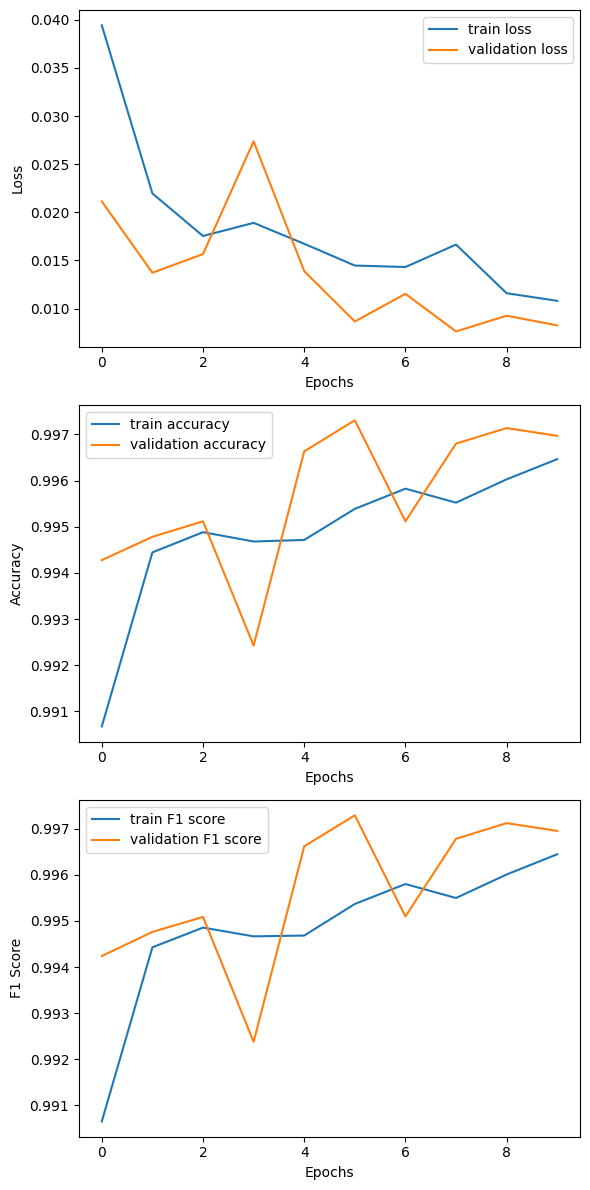

In [ ]:
plot_training_history(history)

## Build Multimodal Model

### ======================**multimodal  Model**========================

In [ ]:
class ImgFeatureExtractor(nn.Module):
    def __init__(self):
        super(ImgFeatureExtractor, self).__init__()
        self.backbone = models.resnet50(pretrained=True)
        self.embedding = nn.Linear(1000,512)
        
        #ResNet50 parameter freeze
        for param in self.backbone.parameters():
            param.requires_grad = False
        
    def forward(self, x):
        x = self.backbone(x)
        x = self.embedding(x)
        return x

In [ ]:
#LeakyReLU()에 대한 설명 => 발표시 잠깐 설명?
class TabularFeatureExtractor(nn.Module):
    def __init__(self):
        super(TabularFeatureExtractor, self).__init__()
        self.embedding = nn.Sequential(
            nn.Linear(in_features=8, out_features=128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(in_features=128, out_features=256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(in_features=256, out_features=512),
        )
        
    def forward(self, x):
        x = self.embedding(x)
        return x

In [ ]:
# concat 1024 => dense 256 => dropout 0.5 => dense 3
class ClassificationModel(nn.Module):
    def __init__(self):
        super(ClassificationModel, self).__init__()
        self.img_feature_extractor = ImgFeatureExtractor()
        self.tabular_feature_extractor = TabularFeatureExtractor()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=1024, out_features=256),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(in_features=256, out_features=3),
            nn.Softmax(dim=1),
        )
    # feature extractor 각 output들을 concat 후 classifier로!
    def forward(self, img, tabular):
        img_feature = self.img_feature_extractor(img)
        tabular_feature = self.tabular_feature_extractor(tabular)
        feature = torch.cat([img_feature, tabular_feature], dim=-1)
        output = self.classifier(feature)
        return output

In [ ]:
def training(model, optimizer, train_loader, val_loader, device):
    model.to(device)
    criterion = nn.CrossEntropyLoss().to(device)
    
    train_acc_history = []
    train_f1_score_history = []
    train_loss_history = []
    val_acc_history = []
    val_f1_score_history = []
    val_loss_history = []
    
    best_val_f1_score = 0.0  
    best_model = None
    best_epoch = 0
    i = 0
    # 20에폭 학습
    for epoch in range(1, 21):
        model.train()
        train_loss = []
        pred_labels = []
        true_labels = []
        
        for tabular, img, label in tqdm(iter(train_loader)):
            img = img.float().to(device)
            tabular = tabular.float().to(device)
            label = label.float().to(device)
            
            optimizer.zero_grad()
            
            model_pred = model(img, tabular)
            
            loss = criterion(model_pred, label)
            
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.item())
            
            predicted = torch.argmax(model_pred, dim=1)
            pred_labels += [[1. if i == pred else 0. for i in range(model_pred.shape[1])] for pred in predicted.tolist()]
            true_labels += label.tolist()
        
        train_acc = metrics.accuracy_score(true_labels, pred_labels)
        train_f1_score = metrics.f1_score(true_labels, pred_labels, average='macro')
        
        val_loss, val_acc, val_f1_score = validation(model, criterion, val_loader, device)
        
        train_acc_history.append(train_acc)
        train_f1_score_history.append(train_f1_score)
        train_loss_history.append(np.mean(train_loss))
        val_acc_history.append(val_acc)
        val_f1_score_history.append(val_f1_score)
        val_loss_history.append(val_loss)
        
        print(f'Epoch [{epoch}], Train Loss: {np.mean(train_loss):.5f}, Train Acc: {train_acc:.5f}, Train F1-Score: {train_f1_score:.5f}')
        print(f'Val Loss: {val_loss:.5f}, Val Acc: {val_acc:.5f}, Val F1-Score: {val_f1_score:.5f}')
        
        # validation f1_score가 가장 높은 epoch 저장 및 모델 저장
        if best_val_f1_score < val_f1_score:
            best_val_f1_score = val_f1_score
            best_model = model
            best_epoch = epoch
            i=0
        
        i = i + 1
        
        # validation loss가 5 epoch동안 낮아지지 않았다면 early stop
        if i == 5:
            print("Early stop!")
            break
    print('Best epochs = {}!!'.format(best_epoch))
    
    history = {
        'train_acc': train_acc_history,
        'train_loss': train_loss_history,
        'train_f1_score' : train_f1_score_history,
        'val_acc': val_acc_history,
        'val_loss': val_loss_history,
        'val_f1_score': val_f1_score_history
    }
    
    return best_model, history , best_epoch

train 함수로 validation loss 기준으로 best epoch을 찾을 수 있게함.(5epoch 기준 향상 없을 시,early stop)

In [ ]:
def validation(model, criterion, val_loader, device):
    model.eval()
    pred_labels = []
    true_labels = []
    val_loss = []
    with torch.no_grad():
        for tabular, img , label in tqdm(iter(val_loader)):
            true_labels += label.tolist()

            img = img.float().to(device)
            tabular = tabular.float().to(device)
            label = label.float().to(device) 
            
            model_pred = model(img, tabular)
            
            loss = criterion(model_pred, label)  # 레이블 변화 없이 계산
            
            val_loss.append(loss.item())
            
            predicted = torch.argmax(model_pred, dim=1)
            pred_labels += [[1. if i == pred else 0. for i in range(model_pred.shape[1])] for pred in predicted.tolist()]

    val_acc = metrics.accuracy_score(true_labels, pred_labels)
    val_f1_score = metrics.f1_score(true_labels, pred_labels, average='macro')
    return np.mean(val_loss), val_acc, val_f1_score

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 12))

    ax1.plot(history['train_loss'], label='train loss')
    ax1.plot(history['val_loss'], label='validation loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(history['train_acc'], label='train accuracy')
    ax2.plot(history['val_acc'], label='validation accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    ax3.plot(history['train_f1_score'], label='train F1 score')
    ax3.plot(history['val_f1_score'], label='validation F1 score')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('F1 Score')
    ax3.legend()

    plt.tight_layout()
    plt.show()

## First train

In [ ]:
model = ClassificationModel()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 1e-3)

before_finetune_model, history, best_epoch = training(model, optimizer, train_loader, val_loader, device)

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [1], Train Loss: 0.56622, Train Acc: 0.98616, Train F1-Score: 0.98613
Val Loss: 0.55748, Val Acc: 0.99377, Val F1-Score: 0.99376


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [2], Train Loss: 0.55759, Train Acc: 0.99381, Train F1-Score: 0.99381
Val Loss: 0.55593, Val Acc: 0.99546, Val F1-Score: 0.99543


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [3], Train Loss: 0.55682, Train Acc: 0.99461, Train F1-Score: 0.99460
Val Loss: 0.55593, Val Acc: 0.99546, Val F1-Score: 0.99543


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [4], Train Loss: 0.55748, Train Acc: 0.99390, Train F1-Score: 0.99390
Val Loss: 0.55593, Val Acc: 0.99546, Val F1-Score: 0.99543


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [5], Train Loss: 0.55886, Train Acc: 0.99247, Train F1-Score: 0.99248
Val Loss: 0.55593, Val Acc: 0.99546, Val F1-Score: 0.99543


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [6], Train Loss: 0.55811, Train Acc: 0.99331, Train F1-Score: 0.99332
Val Loss: 0.55809, Val Acc: 0.99327, Val F1-Score: 0.99328
Early stop!
Best epochs = 2!!


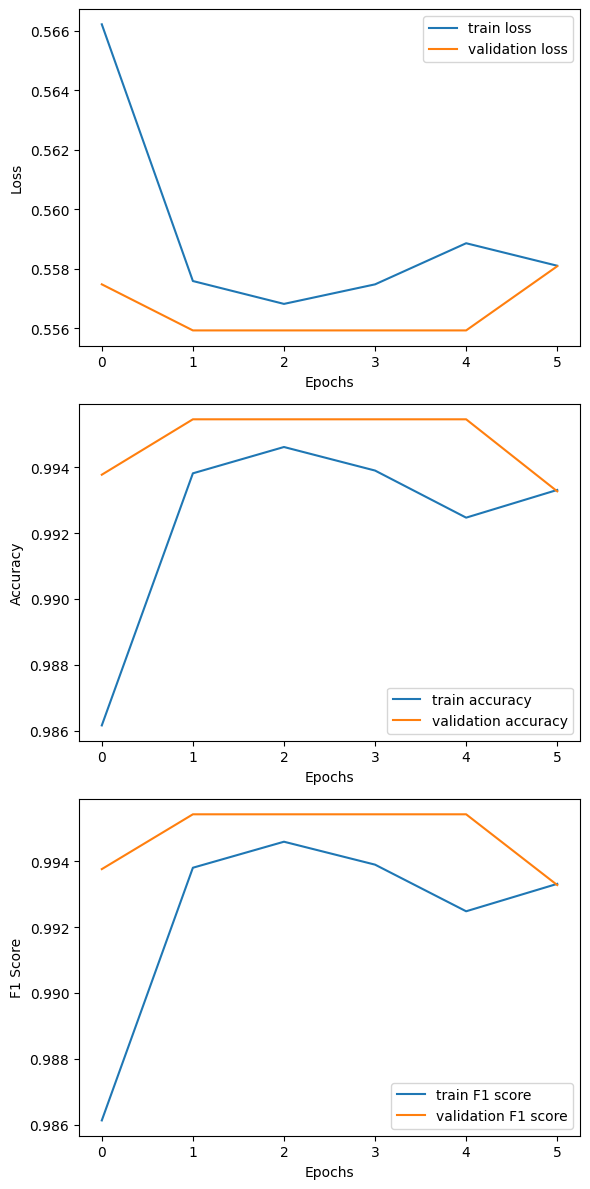

In [ ]:
plot_training_history(history)

## Fine tuning

validation에 대해서 성능이 가장 좋았던 model에 대해서 fine tuning

In [ ]:
# 마지막 conv block trainable = True
for param in before_finetune_model.img_feature_extractor.backbone.layer4[2].parameters():
    param.requires_grad = True
# LR : 0.001 => 0.0001 for fine tuning
optimizer = torch.optim.Adam(params = before_finetune_model.parameters(), lr = 1e-4)
finetuned_model, history, best_epoch_for_finetune = training(before_finetune_model, optimizer, train_loader, val_loader, device)

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [1], Train Loss: 0.55812, Train Acc: 0.99331, Train F1-Score: 0.99332
Val Loss: 0.55641, Val Acc: 0.99495, Val F1-Score: 0.99494


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [2], Train Loss: 0.55734, Train Acc: 0.99407, Train F1-Score: 0.99406
Val Loss: 0.55610, Val Acc: 0.99529, Val F1-Score: 0.99527


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [3], Train Loss: 0.55719, Train Acc: 0.99423, Train F1-Score: 0.99423
Val Loss: 0.55610, Val Acc: 0.99529, Val F1-Score: 0.99527


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [4], Train Loss: 0.55735, Train Acc: 0.99407, Train F1-Score: 0.99405
Val Loss: 0.55683, Val Acc: 0.99461, Val F1-Score: 0.99459


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [5], Train Loss: 0.55707, Train Acc: 0.99432, Train F1-Score: 0.99431
Val Loss: 0.55593, Val Acc: 0.99546, Val F1-Score: 0.99543


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [6], Train Loss: 0.55695, Train Acc: 0.99449, Train F1-Score: 0.99447
Val Loss: 0.55593, Val Acc: 0.99546, Val F1-Score: 0.99543


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [7], Train Loss: 0.55695, Train Acc: 0.99449, Train F1-Score: 0.99447
Val Loss: 0.55593, Val Acc: 0.99546, Val F1-Score: 0.99543


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [8], Train Loss: 0.55695, Train Acc: 0.99449, Train F1-Score: 0.99447
Val Loss: 0.55593, Val Acc: 0.99546, Val F1-Score: 0.99543


  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Epoch [9], Train Loss: 0.55736, Train Acc: 0.99407, Train F1-Score: 0.99406
Val Loss: 0.55593, Val Acc: 0.99546, Val F1-Score: 0.99543
Early stop!
Best epochs = 5!!


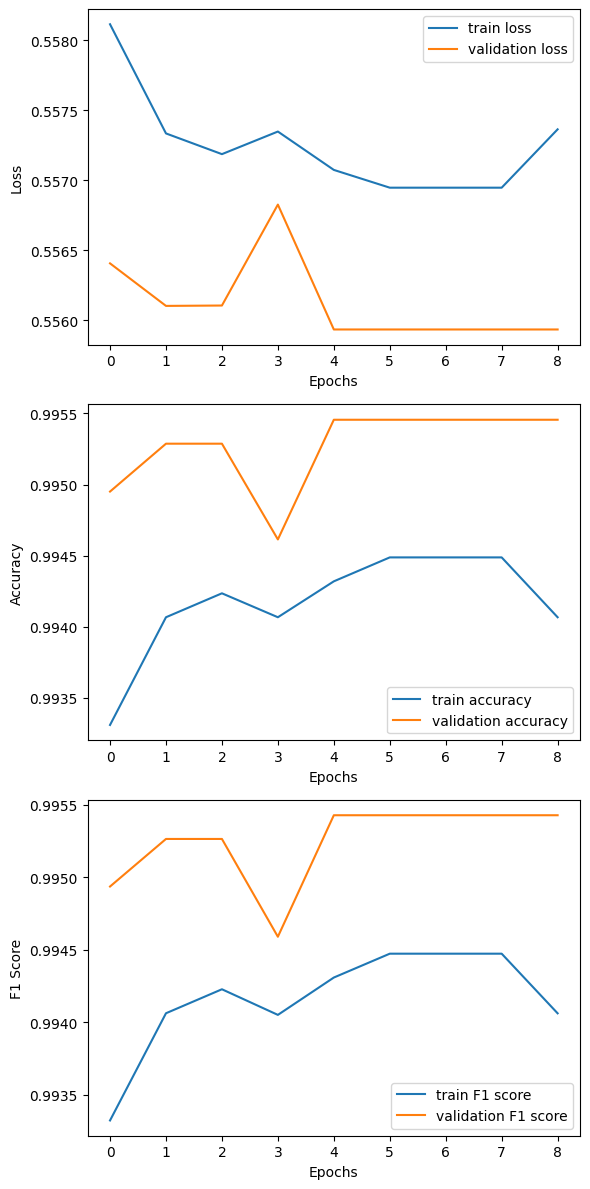

In [ ]:
plot_training_history(history)

- validation set에 대해서 multimodal(image + table)의 성능이 매우 우수하게 나오는것을 확인할 수 있었다.
- best epoch으로 원래 train set에 대해서 다시 학습(fine tuning 동일)

## **5. evaluation**

### vgg evalutaion

## Train dataset 생성

In [ ]:
import os
import random
import shutil

target_dir = './datasets/train'
dst_dir = 'datasets/subsets'

os.makedirs(dst_dir, exist_ok=True)

label = '최하'
src_dir = os.path.join(target_dir, label)
dst_dir2 = os.path.join(dst_dir, label)
os.makedirs(dst_dir2, exist_ok=True)

file_list = os.listdir(src_dir)
random.seed(1004)
random.shuffle(file_list)
selected_files = file_list[:10000]

for filename in selected_files:
    shutil.copy(os.path.join(src_dir, filename), dst_dir2)

In [ ]:
import os
import shutil

target_dir = './datasets/train'
dst_dir = 'datasets/subsets'

os.makedirs(dst_dir, exist_ok=True)

for label in ['상','중']:
    src_dir = os.path.join(target_dir,label)
    dst_dir2 = os.path.join(dst_dir,label)
    os.makedirs(dst_dir2, exist_ok=True)
    # Select the first 10000 images
    for i, filename in enumerate(os.listdir(src_dir)):
        if i >=10000:
            break
        shutil.copy(os.path.join(src_dir, filename), dst_dir2)

## Test data set 생성

In [ ]:
import os
import random
import shutil

target_dir = './datasets/test'
dst_dir = 'datasets/test_subsets'

os.makedirs(dst_dir, exist_ok=True)

for label in ['상','중','최하']:
    src_dir = os.path.join(target_dir, label)
    dst_dir2 = os.path.join(dst_dir, label)
    os.makedirs(dst_dir2, exist_ok=True)

    file_list = os.listdir(src_dir)
    random.seed(1004)
    random.shuffle(file_list)
    selected_files = file_list[:500]

    for filename in selected_files:
        shutil.copy(os.path.join(src_dir, filename), dst_dir2)

## 전체 Train data로 학습

In [ ]:
train_dir = './datasets/subsets'

image_size = (224, 224)
batch_size = 128

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# train 데이터에 대한 ImageDataGenerator 생성
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    batch_size=batch_size,
    target_size=image_size,
    class_mode='categorical'
)

Found 30000 images belonging to 3 classes.


In [ ]:
test_dir = './datasets/test_subsets'

# test 데이터에 대한 ImageDataGenerator 생성
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    batch_size=batch_size,
    target_size=image_size,
    class_mode='categorical'
)

Found 1500 images belonging to 3 classes.


In [ ]:

# VGG16 불러오기
conv_base = VGG16(input_shape=(224, 224, 3),
                              include_top=False,
                              weights="imagenet")

# CNN 모델 정의
model = Sequential([
    conv_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])


# 마지막 conv layer 제외하고 parameter freeze
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv3':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# 모델 summary
model.summary()
    
# 모델 컴파일
model.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=3, average='macro')])

best_epochs = 14

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=best_epochs,
    callbacks=[es]
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 771       
                                                                 
Total params: 14,846,787
Trainable params: 2,491,907
Non-trainable params: 12,354,880
__________________________________

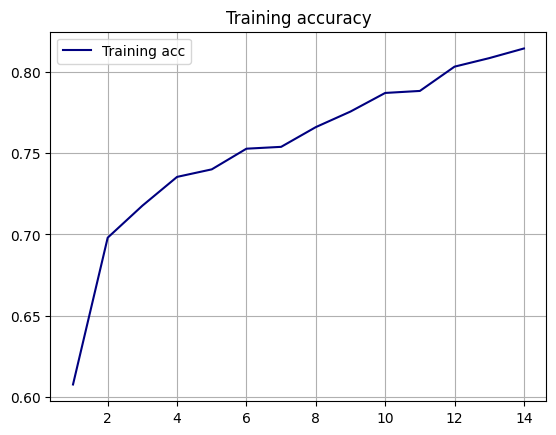

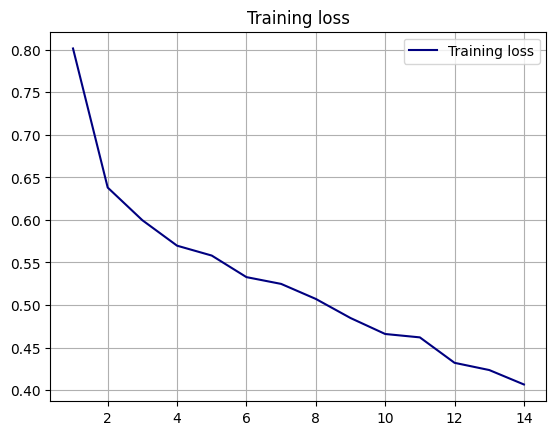

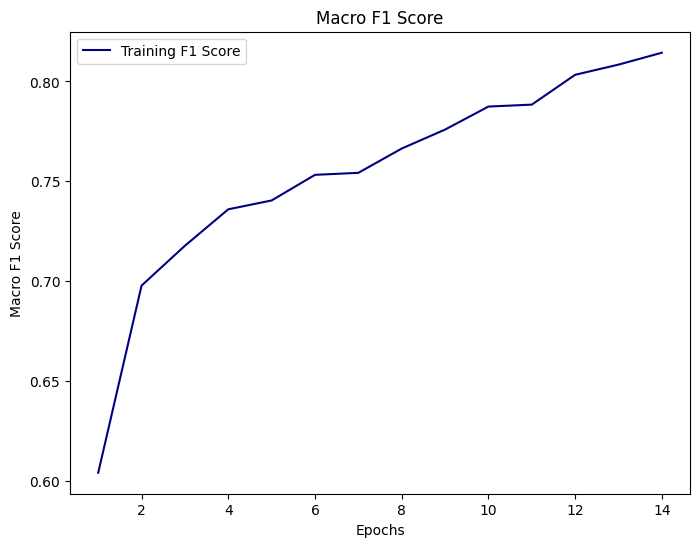

In [ ]:
acc = history.history['accuracy'] 
loss = history.history['loss'] 
f1_scores = history.history['f1_score']

epochs = range(1, len(acc) + 1)

plt.plot(range(1,best_epochs+1), acc, 'navy', label='Training acc')
plt.title('Training accuracy') 
plt.grid()
plt.legend()

plt.figure()

plt.plot(range(1,best_epochs+1), loss, 'navy', label='Training loss')
plt.title('Training loss') 
plt.grid()
plt.legend()

# Macro F1 점수 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1,best_epochs+1), f1_scores, 'navy', label='Training F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Macro F1 Score')
plt.title('Macro F1 Score')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from keras.utils import np_utils


# 모델 평가
score = model.evaluate(test_generator, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Macro F1 Score:', score[2])

Test loss: 0.5611860752105713
Test accuracy: 0.7419999837875366
Macro F1 Score: 0.7445648312568665


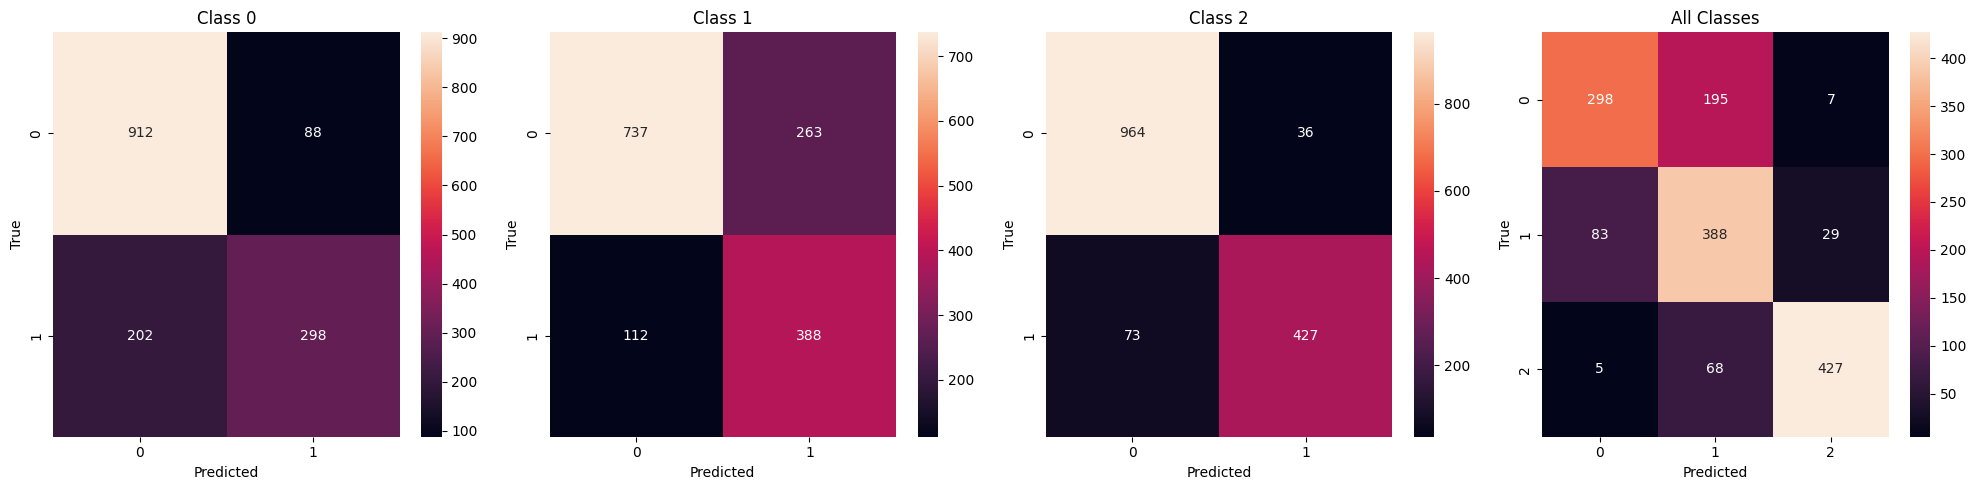

In [ ]:
y_true = []
y_pred_classes = []
for i in range(len(test_generator)):
    # Get batch
    x_batch, y_batch_true = test_generator[i]

    # Predict on batch
    y_batch_pred = model.predict_on_batch(x_batch)
    y_batch_pred_classes = np.argmax(y_batch_pred, axis=1)

    # Append batch predictions and true labels
    y_pred_classes.extend(y_batch_pred_classes)
    y_true.extend(np.argmax(y_batch_true, axis=1)) # assuming one-hot encoding

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_classes = np.array(y_pred_classes)

# 각 클래스에 대한 confusion matrix 생성
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i in range(3):
    # 이진 분류 문제로 간주
    binary_true = y_true == i
    binary_pred = y_pred_classes == i

    # confusion matrix 생성
    conf_mat = confusion_matrix(binary_true, binary_pred)

    # confusion matrix 시각화
    sns.heatmap(conf_mat, annot=True, fmt='d', ax=ax[i])
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('True')
    ax[i].set_title(f'Class {i}')

# 모든 클래스에 대한 confusion matrix 생성
conf_mat = confusion_matrix(y_true, y_pred_classes)

# confusion matrix 시각화
sns.heatmap(conf_mat, annot=True, fmt='d', ax=ax[3])
ax[3].set_xlabel('Predicted')
ax[3].set_ylabel('True')
ax[3].set_title('All Classes')

plt.tight_layout()
plt.show()

### table evaluation

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def table_evaluate(model, test_loader, device):
    model.eval()
    criterion = nn.CrossEntropyLoss().to(device)
    
    pred_labels = []
    true_labels = []
    test_loss = []
    with torch.no_grad():
        for tabular, img, label in tqdm(iter(test_loader)):
            true_labels += label.tolist()

            tabular = tabular.float().to(device)
            label = label.float().to(device) 
            
            model_pred = model(tabular)
            
            loss = criterion(model_pred, label)
            test_loss.append(loss.item())
            
            predicted = torch.argmax(model_pred, dim=1)
            pred_labels += [[1. if i == pred else 0. for i in range(model_pred.shape[1])] for pred in predicted.tolist()]

    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)

    # Convert one-hot encoded labels back to label indices
    true_indices = np.argmax(true_labels, axis=1)
    pred_indices = np.argmax(pred_labels, axis=1)

    test_acc = metrics.accuracy_score(true_indices, pred_indices)
    test_f1_score = metrics.f1_score(true_indices, pred_indices, average='macro')
    
    print(f'Test Loss: {np.mean(test_loss):.5f}, Test Acc: {test_acc:.5f}, Test F1-Score: {test_f1_score:.5f}')
    
    # Multilabel Confusion Matrix
    cm = multilabel_confusion_matrix(true_indices, pred_indices)
    
    for i, c in enumerate(cm):
        plt.figure(figsize=(10,7))
        sns.heatmap(c, annot=True, fmt="d")
        plt.title(f"Multilabel Confusion Matrix for Class {i}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
        
    # 3x3 Confusion Matrix
    cm = confusion_matrix(true_indices, pred_indices)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("3x3 Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

  0%|          | 0/11 [00:00<?, ?it/s]

Test Loss: 0.01172, Test Acc: 0.99558, Test F1-Score: 0.99532


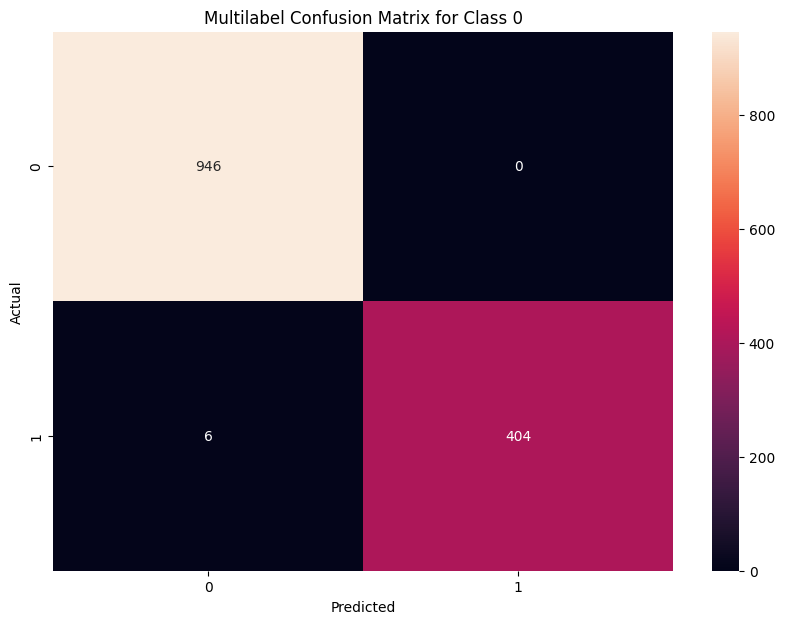

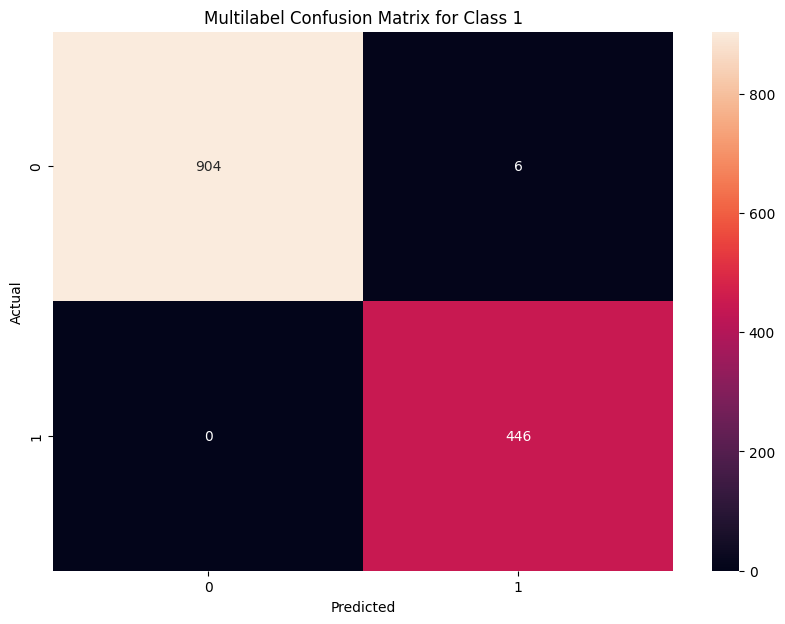

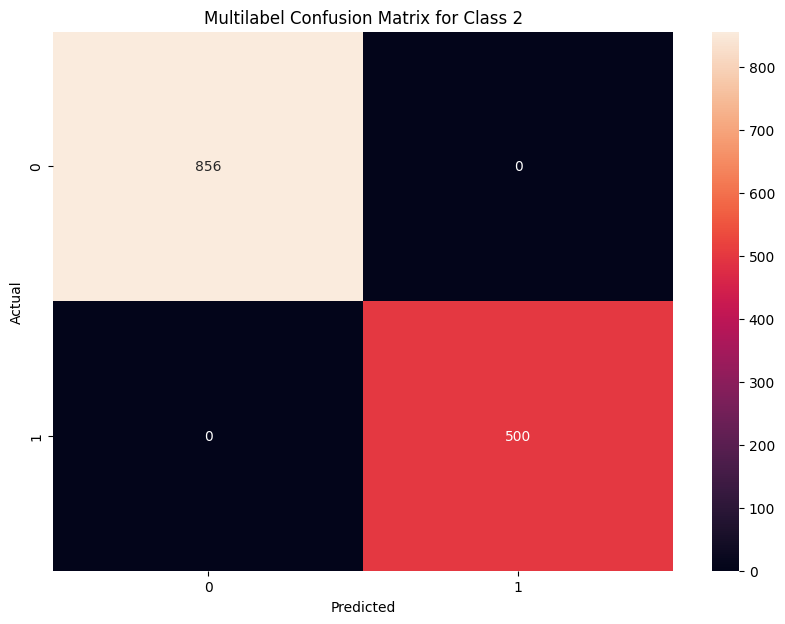

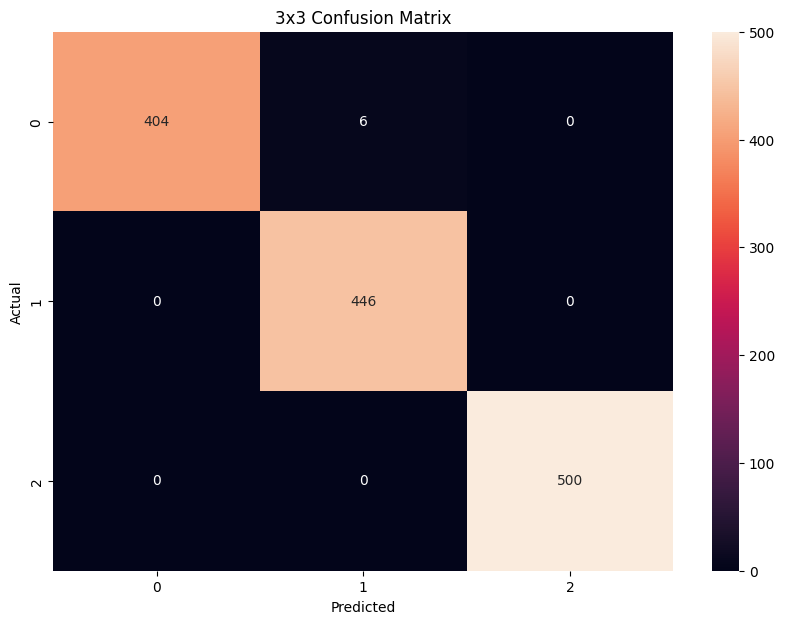

In [ ]:
table_evaluate(table_model, test_loader, device)

### -----------------multimodal evalutaion-----------------

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix

def evaluate(model, test_loader, device):
    model.eval()
    criterion = nn.CrossEntropyLoss().to(device)
    
    true_labels = []
    pred_labels = []
    test_loss = []
    with torch.no_grad():
        for tabular, img, label in tqdm(iter(test_loader)):
            true_labels += label.tolist()

            img = img.float().to(device)
            tabular = tabular.float().to(device)
            label = label.float().to(device) 
            
            model_pred = model(img, tabular)
            
            loss = criterion(model_pred, label)
            test_loss.append(loss.item())
            
            predicted = torch.argmax(model_pred, dim=1)
            pred_labels += [[1 if i == pred else 0 for i in range(model_pred.shape[1])] for pred in predicted.tolist()]

    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)

    # Convert one-hot encoded labels back to label indices
    true_indices = np.argmax(true_labels, axis=1)
    pred_indices = np.argmax(pred_labels, axis=1)

    test_acc = metrics.accuracy_score(true_indices, pred_indices)
    test_f1_score = metrics.f1_score(true_indices, pred_indices, average='macro')
    
    print(f'Test Loss: {np.mean(test_loss):.5f}, Test Acc: {test_acc:.5f}, Test F1-Score: {test_f1_score:.5f}')
    
    # Multilabel Confusion Matrix
    cm = multilabel_confusion_matrix(true_indices, pred_indices)
    
    for i, c in enumerate(cm):
        plt.figure(figsize=(10,7))
        sns.heatmap(c, annot=True, fmt="d")
        plt.title(f"Multilabel Confusion Matrix for Class {i}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
        
    # 3x3 Confusion Matrix
    cm = confusion_matrix(true_indices, pred_indices)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("3x3 Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

  0%|          | 0/11 [00:00<?, ?it/s]

Test Loss: 0.55832, Test Acc: 0.99336, Test F1-Score: 0.99305


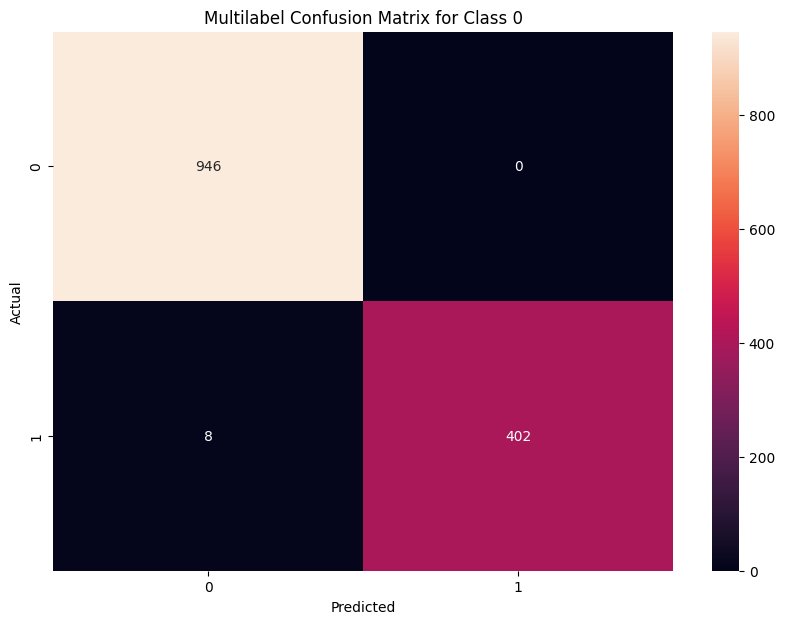

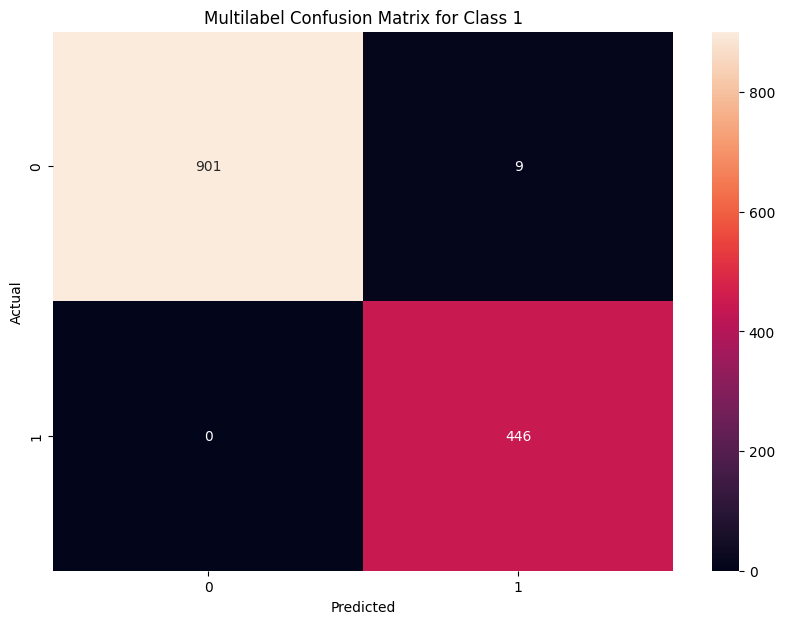

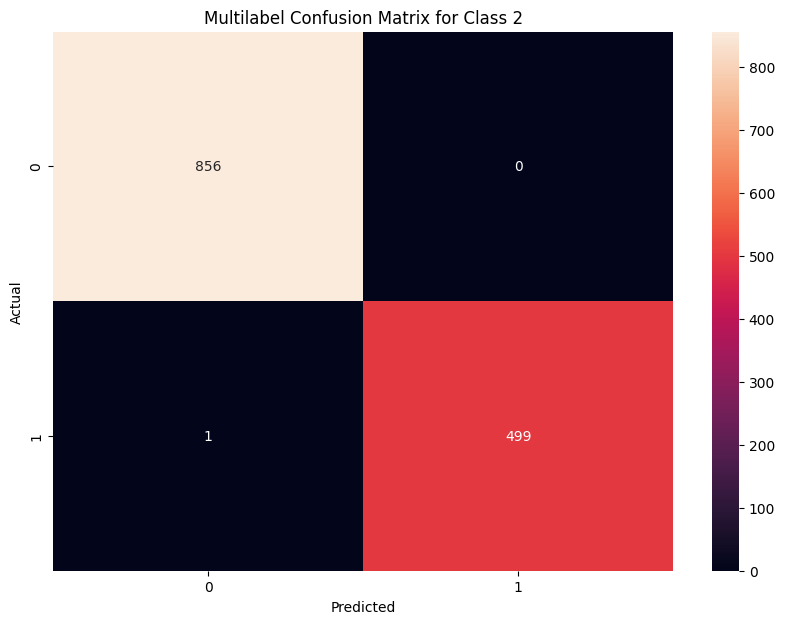

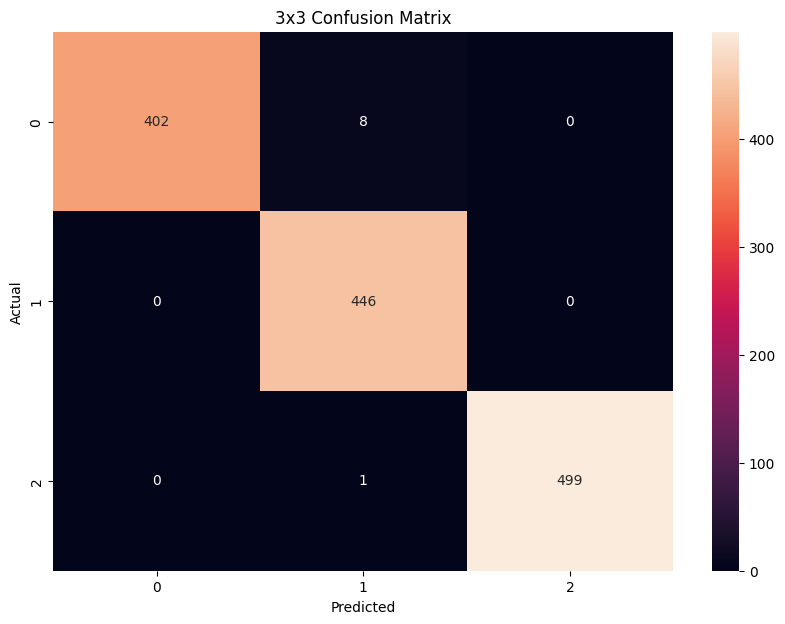

In [ ]:
evaluate(final_finetuned_model, test_loader, device)

## **7. 프로젝트 결론 및 한계점**

* class 4개가 다 있었으면 yolo와의 정확한 비교가 되지 않았을까?

<table>
<tr><td><b>기존 Ai hub상에서의 class 분포</b></td><td><b>실제 dataset class 분포('하'class 존재하지 않음)></b></td></tr>
<tr><td><img src="https://github.com/lej8924/DeepLearning_team02/assets/71022086/eb353851-bf86-4c3b-b558-95cfdc1b050b"  ></td><td>
<img src="https://github.com/lej8924/DeepLearning_team02/assets/71022086/ebcc2c8b-93c5-47ee-bffc-f7eb54bea168" ></td></tr>
</table>

* gpu 메모리 부족으로 인한 data_augmentation을 수행했으면 성능이 더 좋아지지 않았을까?

![](https://t1.daumcdn.net/cfile/tistory/251BD33E5832463608)

* 이 테이블 데이터는 우리의 프로젝트 동기 상황에서 조금 거리가 먼 데이터같다는 생각이 들었다. 실제로는 비전문가가 테이블 데이터처럼 내백,내공의 유무 및 측정을 할 수 있지 않기 때문이다.

*  Image modeling 과정 중 여러가지 hyperparameter를 찾는 부분에서 macro f1-score 구하는 코드에서 오류가 있었는지, 약 0.3정도로만 성능이 나왔다. 

=> 코드가 잘못된 것을 프로젝트 발표 직전에 발견하게 되어, 여러가지 hyperparameter에 대해서 찾는 과정 중에서는 부득이하게 accuracy 지표만을 보고 판단하게 되었다. 그 이후의 과정에서는 계획대로 macro f1-score를 사용하였고, Data imbalance를 down sampling으로 해결하였기 때문에, macro f1-score만으로 평가하는 것은 부적절하다고 판단하여, 동시에 accuracy도 같이 관찰하며 실험을 진행했다.

## **8. 협업 진행**

### Contribution
![image](https://github.com/lej8924/DeepLearning_team02/assets/71022086/019a20b8-8e04-4bbe-8432-d650712a8faa)

## Notion
> Link : https://www.notion.so/0f28d9b92d71417e99887e823118e248?pvs=4
>
>![image](https://github.com/lej8924/DeepLearning_team02/assets/71022086/6d12cb63-a6b7-495f-bc5d-ec7ef9e927d5)